<a href="https://colab.research.google.com/github/Andrew-1993/final_project_sda/blob/master/Desicion_Tree_MS_STOCK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
df = pd.read_csv('/content/drive/My Drive/MSFT.csv', )

In [21]:
df.reset_index(inplace=True)

In [22]:
df2 = df['Close']

In [23]:
df2 = pd.DataFrame(df2)     

In [24]:
future_days = 100
df2['Prediction'] = df2['Close'].shift(-future_days)

In [25]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 93.639999]
 [ 93.32    ]
 [ 93.860001]
 ...
 [249.199997]
 [246.789993]
 [234.240005]]


<ipython-input-25-5c69b61eae2a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [26]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[109.620003 107.68     105.370003 ... 246.270004 251.110001 255.289993]


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [29]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-29-4ab4510f9901>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


array([[266.820007],
       [254.080002],
       [253.139999],
       [252.559998],
       [260.649994],
       [259.619995],
       [262.519989],
       [265.899994],
       [273.23999 ],
       [271.869995],
       [272.420013],
       [274.579987],
       [270.019989],
       [268.75    ],
       [272.5     ],
       [270.410004],
       [264.790009],
       [252.990005],
       [242.259995],
       [244.490005],
       [251.759995],
       [244.970001],
       [247.649994],
       [253.740005],
       [253.130005],
       [258.859985],
       [267.700012],
       [264.890015],
       [256.480011],
       [260.26001 ],
       [256.829987],
       [259.579987],
       [262.850006],
       [266.209991],
       [268.399994],
       [267.660004],
       [264.51001 ],
       [253.669998],
       [252.720001],
       [254.080002],
       [256.720001],
       [254.25    ],
       [259.529999],
       [262.269989],
       [264.839996],
       [260.359985],
       [258.829987],
       [251.8

In [30]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[336.070007 244.369995 225.75     234.240005 228.559998 245.029999
 238.5      247.490005 236.149994 242.119995 247.25     237.5
 231.320007 244.690002 247.25     232.130005 228.169998 220.100006
 214.25     221.389999 227.869995 228.869995 224.509995 242.979996
 247.110001 241.550003 241.970001 241.729996 241.679993 241.220001
 242.050003 245.029999 247.580002 247.490005 241.759995 240.330002
 255.139999 254.690002 255.020004 244.369995 245.119995 244.369995
 300.179993 245.419998 252.509995 256.920013 241.550003 249.009995
 244.690002 240.449997 241.800003 244.429993 238.190002 238.729996
 287.929993 297.309998 259.529999 239.820007 294.589996 334.75
 222.309998 224.929993 227.119995 228.850006 235.770004 238.509995
 239.229996 261.630005 235.809998 231.929993 240.220001 336.720001
 242.039993 240.610001 248.       248.160004 242.710007 333.130005
 301.149994 264.600006 258.350006 256.769989 267.559998 266.730011
 263.619995 221.389999 271.320007 272.170013 269.320007 262.149994
 258

In [31]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[268.81383046 258.00440016 257.20684184 256.71473211 263.57879912
 262.70488247 265.16542178 268.03323294 274.26095225 273.09856138
 273.56523163 275.39789091 271.52889866 270.45135924 273.63309768
 271.85981219 267.09145108 257.07957739 247.97555465 249.86763693
 256.0359587  250.27489605 252.54877252 257.71592508 257.1983623
 262.06004166 269.56048266 267.17630253 260.04072039 263.24791189
 260.33766229 262.67093714 265.44542918 268.2962541  270.1543919
 269.52653733 266.85388213 257.65652669 256.85048883 258.00440016
 260.24434317 258.14863727 262.62852414 264.95330588 267.13386323
 263.33273704 262.03458945 256.15474275 270.44286612 276.95059369
 280.62442913 278.30814052 275.60153914 282.09228047 283.09346156
 282.46560699 280.26808885 281.94803063 287.76850439 285.9527796
 290.10177925 291.4253799  290.78053909 289.60118828 288.62546025
 285.21462052 278.0875315  276.9760459  276.42455051 279.02084653
 269.89136988 267.46477676 265.54724057 264.2745452  263.36668322
 259.68435466

In [32]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

<ipython-input-32-3343a07a945e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


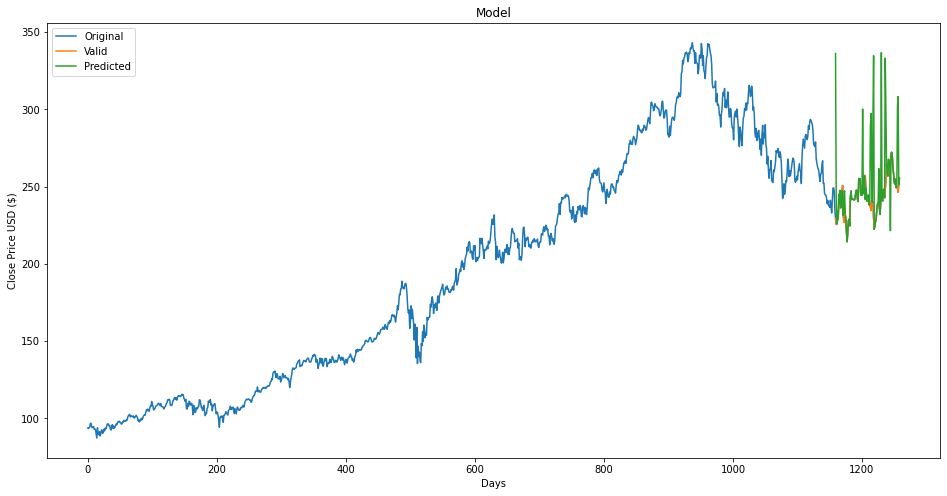

In [33]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()